**IMPORTING ALL THE REQUIRED LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from time import time

In [ ]:
df_train = pd.read_csv('train_cleaned_reviews.csv')
df_test = pd.read_csv('test_cleaned_reviews.csv')

In [ ]:
df_train.head(10)

,review,target
0,stuning even for the non gamer this sound trac...,1.0
1,the best soundtrack ever to anything reading l...,1.0
2,amazing this soundtrack is my favorite music o...,1.0
3,excellent soundtrack truly like this soundtrac...,1.0
4,remember pull your jaw off the floor after hea...,1.0
5,an absolute masterpiece am quite sure any of y...,1.0
6,buyer beware this is self published book and i...,0.0
7,glorious story loved whisper of the wicked sai...,1.0
8,five star book just finished reading whisper o...,1.0
9,whispers of the wicked saints this was easy to...,1.0


In [ ]:
df_train.shape

(230285, 2)

In [ ]:
df_test.head(10)

,review,target
0,great cd my lovely pat has one of the great vo...,1.0
1,one of the best game music soundtracks for gam...,1.0
2,batteries died within year bought this charger...,0.0
3,works fine but maha energy is better check out...,1.0
4,great for the non audiophile reviewed quite bi...,1.0
5,dvd player crapped out after one year also beg...,0.0
6,incorrect disc love the style of this but afte...,0.0
7,dvd menu select problems cannot scroll through...,0.0
8,unique weird orientalia from the exotic tales ...,1.0
9,not an ultimate guide firstly enjoyed the form...,0.0


In [ ]:
df_test.shape

(246623, 2)

In [ ]:
df_train['target'].value_counts()

1.0    117284
0.0    113000
Name: target, dtype: int64

In [ ]:
df_test['target'].value_counts()

1.0    123725
0.0    122897
Name: target, dtype: int64

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230285 entries, 0 to 230284
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   review  230285 non-null  object 
 1   target  230284 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.5+ MB


In [ ]:
df_train.isnull().sum()

review    0
target    1
dtype: int64

In [ ]:
df_test.isnull().sum()

review    0
target    1
dtype: int64

In [ ]:
df_train.columns = ['review','target']
fraction_to_sample = 0.177
df_train = df_train.sample(frac=fraction_to_sample)
df_train.shape

(40760, 2)

In [ ]:
df_test.columns = ['review','target']
df_test.shape

(246623, 2)

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(df_train['review'], df_train['target'], test_size = 0.02, random_state = 45)

print("training data has {0} entries. {1:.2f}% positive and {2:.2f}% negative".format(len(y_train), len(y_train[y_train==1])/len(y_train)*100, len(y_train[y_train==0])/len(y_train)*100))
print("validation data has {0} entries. {1:.2f}% positive and {2:.2f}% negative".format(len(y_validation), len(y_validation[y_validation==1])/len(y_validation)*100, len(y_validation[y_validation==0])/len(y_validation)*100))

training data has 39944 entries. 50.77% positive and 49.23% negative
validation data has 816 entries. 53.06% positive and 46.94% negative


In [ ]:
tb_sentiment = [TextBlob(text).sentiment.polarity for text in X_validation]
tb_sentiment_binary = [0 if x < 0 else 1 for x in tb_sentiment]
print(tb_sentiment_binary)

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 

In [ ]:
cm = confusion_matrix(y_validation, tb_sentiment_binary)
cm

array([[142, 241],
       [ 22, 411]])

In [ ]:
print("accuracy = {:.2f}".format(accuracy_score(y_validation, tb_sentiment_binary)))
print(classification_report(y_validation, tb_sentiment_binary))

accuracy = 0.68
              precision    recall  f1-score   support

         0.0       0.87      0.37      0.52       383
         1.0       0.63      0.95      0.76       433

    accuracy                           0.68       816
   macro avg       0.75      0.66      0.64       816
weighted avg       0.74      0.68      0.65       816



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [ ]:
vectorizer = CountVectorizer()
clf = MultinomialNB()
n_features = np.arange(10000, 100001, 10000)

In [ ]:
df_word_freq = pd.read_csv('word_frequency.csv')
df_word_freq.columns =['word','negative','positive','total']

In [ ]:
df_word_freq.head(20)

,word,negative,positive,total
0,to,313164,252567,565731
1,the,257870,266013,523883
2,not,238226,103119,341345
3,my,190845,125979,316824
4,it,157482,147804,305286
5,and,153972,149649,303621
6,you,103890,198340,302230
7,is,135021,111667,246688
8,in,115543,101163,216706
9,for,99003,117372,216375


In [ ]:
stop_words = list(df_word_freq.head(40).word)
del stop_words[3]
stop_words

['to',
 'the',
 'not',
 'it',
 'and',
 'you',
 'is',
 'in',
 'for',
 'of',
 'on',
 'that',
 'me',
 'have',
 'so',
 'do',
 'but',
 'just',
 'with',
 'be',
 'at',
 'can',
 'was',
 'this',
 'now',
 'good',
 'up',
 'day',
 'all',
 'out',
 'get',
 'are',
 'like',
 'no',
 'go',
 'today',
 'will',
 'too',
 'your']

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
lematize = WordNetLemmatizer()

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df_train_1 = df_train.copy()
df_train_1['review'] = [' '.join([lematize.lemmatize(word) for word in text.split()]) for text in df_train_1['review'].tolist()]
X_train, X_validation, y_train, y_validation = train_test_split(df_train['review'], df_train['target'], test_size = 0.02, random_state = 45)

In [ ]:
df_train_1.head(10)

,review,target
62193,displeased how can anyone order product withou...,0.0
52422,jason gedrick delivers powerful and convincing...,1.0
82329,full of info this book wa awesome everyone kno...,1.0
74091,true jazz classic this is one of the truely gr...,1.0
85404,an amazing story of survival and triumph this ...,1.0
194922,circumfetishist who want to make circumcision ...,0.0
32569,this is all recycled trash stolen from other m...,0.0
209608,thin unbalanced pad mat wa much thinner than e...,0.0
220507,work well but light is very bright it produce ...,1.0
156292,garbage read half of the first chapter then se...,0.0


In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
stemmer = PorterStemmer()

In [ ]:
df_train_1 = df_train.copy()
df_train_1['review'] = [' '.join([stemmer.stem(word) for word in text.split()]) for text in df_train_1['review'].tolist()]
X_train, X_validation, y_train, y_validation = train_test_split(df_train['review'], df_train['target'], test_size = 0.02, random_state = 45)

In [ ]:
df_train_1.head(10)

,review,target
62193,displeas how can anyon order product without a...,0.0
52422,jason gedrick deliv power and convinc perform ...,1.0
82329,full of info thi book wa awesom everyon know s...,1.0
74091,true jazz classic thi is one of the trueli gre...,1.0
85404,an amaz stori of surviv and triumph thi is an ...,1.0
194922,circumfetishist who want to make circumcis man...,0.0
32569,thi is all recycl trash stolen from other musi...,0.0
209608,thin unbalanc pad mat wa much thinner than exp...,0.0
220507,work well but light is veri bright it produc n...,1.0
156292,garbag read half of the first chapter then sen...,0.0


In [ ]:
def compare_clf_nfeature(X_train, X_test, y_train, y_test, vectorizer, clf, n_features, stop_words=None, ngram_range=(1, 1)):
    res = []
    print(clf)
    for feature in n_features:
        vectorizer.set_params(stop_words=stop_words, ngram_range=ngram_range, max_features=feature)
        acc_pipeline = Pipeline([('vectorizer', vectorizer), ('classifier', clf)])
        print("result on model with {} features".format(feature))
        accuracy, auc, time = calc_accuracy(acc_pipeline, X_train, X_test, y_train, y_test)
        res.append((feature, accuracy, auc, time))

    return res

In [ ]:
def calc_accuracy(pipeline, X_train, X_test, y_train, y_test):
    t0 = time()
    sentiment_clf = pipeline.fit(X_train, y_train)
    y_pred = sentiment_clf.predict(X_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)

    print("model accuracy : {0:.2f}".format(accuracy))
    print("model auc : {0:.2f}".format(roc_auc))
    print("train validation time : {0:.2f}s".format(train_test_time))
    print("=========================================================")

    return accuracy, roc_auc, train_test_time

In [ ]:
result_trigram_stem = compare_clf_nfeature(X_train, X_validation, y_train, y_validation,vectorizer, clf, n_features, ngram_range=(1,3))

MultinomialNB()
result on model with 10000 features
model accuracy : 0.86
model auc : 0.86
train validation time : 20.74s
result on model with 20000 features
model accuracy : 0.87
model auc : 0.87
train validation time : 20.31s
result on model with 30000 features
model accuracy : 0.87
model auc : 0.87
train validation time : 19.07s
result on model with 40000 features
model accuracy : 0.88
model auc : 0.88
train validation time : 25.24s
result on model with 50000 features
model accuracy : 0.88
model auc : 0.89
train validation time : 24.31s
result on model with 60000 features
model accuracy : 0.88
model auc : 0.88
train validation time : 19.33s
result on model with 70000 features
model accuracy : 0.89
model auc : 0.89
train validation time : 19.25s
result on model with 80000 features
model accuracy : 0.89
model auc : 0.89
train validation time : 18.40s
result on model with 90000 features
model accuracy : 0.89
model auc : 0.89
train validation time : 19.38s
result on model with 100000 fe

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(df_train['review'], df_train['target'], test_size = 0.02, random_state = 45)
tf_vectorizer = TfidfVectorizer()
result_tfidf_trigram = compare_clf_nfeature(X_train, X_validation, y_train, y_validation,tf_vectorizer, clf, n_features, ngram_range=(1,3))

MultinomialNB()
result on model with 10000 features
model accuracy : 0.86
model auc : 0.86
train validation time : 18.57s
result on model with 20000 features
model accuracy : 0.87
model auc : 0.87
train validation time : 18.71s
result on model with 30000 features
model accuracy : 0.88
model auc : 0.88
train validation time : 19.39s
result on model with 40000 features
model accuracy : 0.88
model auc : 0.88
train validation time : 18.51s
result on model with 50000 features
model accuracy : 0.89
model auc : 0.89
train validation time : 18.74s
result on model with 60000 features
model accuracy : 0.89
model auc : 0.89
train validation time : 18.85s
result on model with 70000 features
model accuracy : 0.89
model auc : 0.89
train validation time : 25.62s
result on model with 80000 features
model accuracy : 0.89
model auc : 0.89
train validation time : 22.94s
result on model with 90000 features
model accuracy : 0.89
model auc : 0.89
train validation time : 21.04s
result on model with 100000 fe

In [ ]:
result_tfidf_bigram = compare_clf_nfeature(X_train, X_validation, y_train, y_validation,tf_vectorizer, clf, n_features, ngram_range=(1,2))

MultinomialNB()
result on model with 10000 features
model accuracy : 0.86
model auc : 0.86
train validation time : 7.74s
result on model with 20000 features
model accuracy : 0.86
model auc : 0.86
train validation time : 8.24s
result on model with 30000 features
model accuracy : 0.87
model auc : 0.87
train validation time : 8.22s
result on model with 40000 features
model accuracy : 0.88
model auc : 0.88
train validation time : 7.68s
result on model with 50000 features
model accuracy : 0.88
model auc : 0.88
train validation time : 9.05s
result on model with 60000 features
model accuracy : 0.88
model auc : 0.88
train validation time : 9.07s
result on model with 70000 features
model accuracy : 0.88
model auc : 0.88
train validation time : 7.70s
result on model with 80000 features
model accuracy : 0.88
model auc : 0.88
train validation time : 8.56s
result on model with 90000 features
model accuracy : 0.88
model auc : 0.88
train validation time : 8.30s
result on model with 100000 features
mo

In [ ]:
result_tfidf_unigram = compare_clf_nfeature(X_train, X_validation, y_train, y_validation,tf_vectorizer, clf, n_features, ngram_range=(1,1))

MultinomialNB()
result on model with 10000 features
model accuracy : 0.84
model auc : 0.84
train validation time : 2.44s
result on model with 20000 features
model accuracy : 0.83
model auc : 0.83
train validation time : 2.37s
result on model with 30000 features
model accuracy : 0.84
model auc : 0.84
train validation time : 1.98s
result on model with 40000 features
model accuracy : 0.84
model auc : 0.84
train validation time : 1.92s
result on model with 50000 features
model accuracy : 0.84
model auc : 0.84
train validation time : 2.20s
result on model with 60000 features
model accuracy : 0.84
model auc : 0.84
train validation time : 1.96s
result on model with 70000 features
model accuracy : 0.84
model auc : 0.84
train validation time : 2.57s
result on model with 80000 features
model accuracy : 0.84
model auc : 0.84
train validation time : 2.32s
result on model with 90000 features
model accuracy : 0.84
model auc : 0.84
train validation time : 1.89s
result on model with 100000 features
mo

In [ ]:
cols = ['n_features', 'val_acc', 'val_auc', 'time']
result_tfidf_unigram = pd.DataFrame(result_tfidf_unigram, columns=cols)
result_tfidf_bigram = pd.DataFrame(result_tfidf_bigram, columns=cols)
result_tfidf_trigram = pd.DataFrame(result_tfidf_trigram, columns=cols)

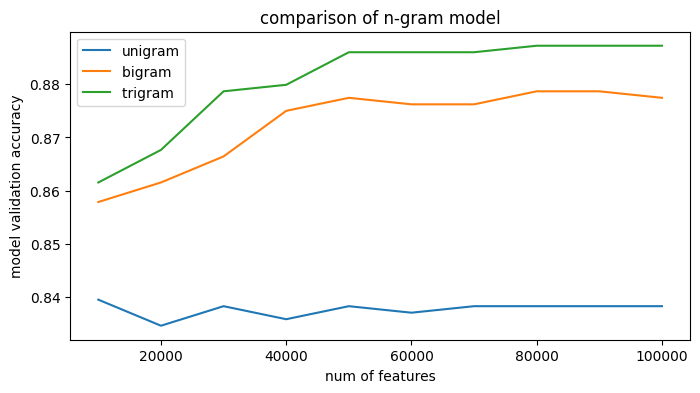

In [ ]:
cols = ['n_features', 'val_acc', 'val_auc', 'time']
result_tfidf_unigram = pd.DataFrame(result_tfidf_unigram, columns=cols)
result_tfidf_bigram = pd.DataFrame(result_tfidf_bigram, columns=cols)
result_tfidf_trigram = pd.DataFrame(result_tfidf_trigram, columns=cols)
plt.figure(figsize=(8,4))
plt.plot(result_tfidf_unigram.n_features, result_tfidf_unigram.val_acc, label='unigram')
plt.plot(result_tfidf_bigram.n_features, result_tfidf_bigram.val_acc, label='bigram ')
plt.plot(result_tfidf_trigram.n_features, result_tfidf_trigram.val_acc, label='trigram ')
plt.title("comparison of n-gram model")
plt.xlabel("num of features")
plt.ylabel("model validation accuracy")
plt.grid()
plt.legend()

**LOGISTIC REGRESSION**

In [ ]:
X_train, y_train = df_train['review'], df_train['target']
X_test, y_test = df_test['review'], df_test['target']

In [ ]:
y_test = y_test.dropna()

In [ ]:
lnr = make_pipeline(TfidfVectorizer(), LogisticRegression())

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
lnr.fit(X_train,y_train)
y_pred = lnr.predict(X_test.iloc[:len(y_test)]) #to ensure X_test and y_test have same length

In [ ]:
y_pred = np.nan_to_num(y_pred)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.88


The confusion matrix: [[107734  15163]
 [ 14824 108901]]


Text(0, 0.5, 'True')

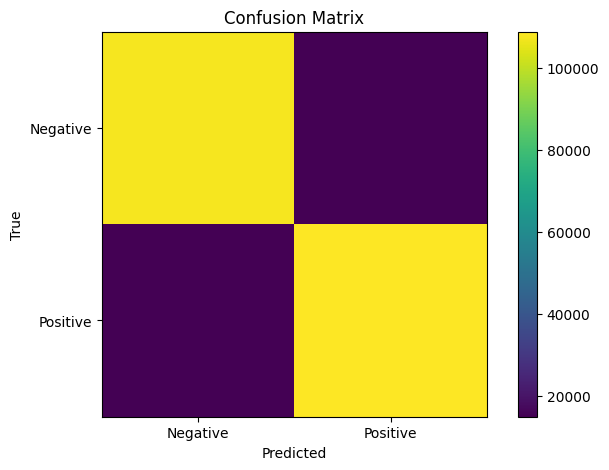

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('The confusion matrix:',conf_matrix)
plt.figure(figsize=(8, 5))
plt.imshow(conf_matrix, interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')

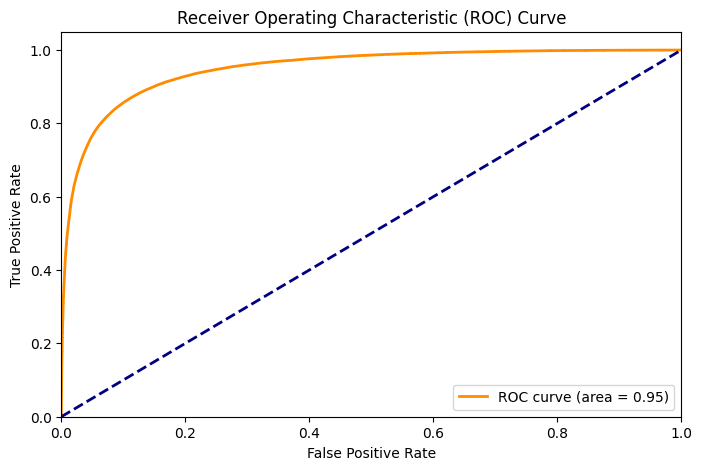

In [ ]:
y_prob = lnr.predict_proba(X_test.iloc[:len(y_test)])[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**NAIVE BAYES CLASSIFIER**

In [ ]:
#CONFUSION MATRIX
def plot(label):
  labels = ['negative','positive']
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(label)
  plt.title('Confusion matrix for the sentiment analysis')
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

In [ ]:
X_train, y_train = df_train['review'], df_train['target']
X_test, y_test = df_test['review'], df_test['target']

In [ ]:
clf = MultinomialNB()
vectorizer = CountVectorizer(ngram_range=(1,3), max_features=90000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
nan_indices = np.isnan(y_test)
X_test = X_test[~nan_indices]
y_test = y_test[~nan_indices]

In [ ]:
clf.fit(X_train, y_train)
prob = clf.predict_proba(X_test)
y_pred = np.argmax(prob, axis=-1)
y_pred_prob = [i[1] for i in prob]
acc_score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(acc_score)
print(cm)

0.886818694195976
[[110584  12313]
 [ 15600 108125]]


              precision    recall  f1-score   support

         0.0      0.876     0.900     0.888    122897
         1.0      0.898     0.874     0.886    123725

    accuracy                          0.887    246622
   macro avg      0.887     0.887     0.887    246622
weighted avg      0.887     0.887     0.887    246622



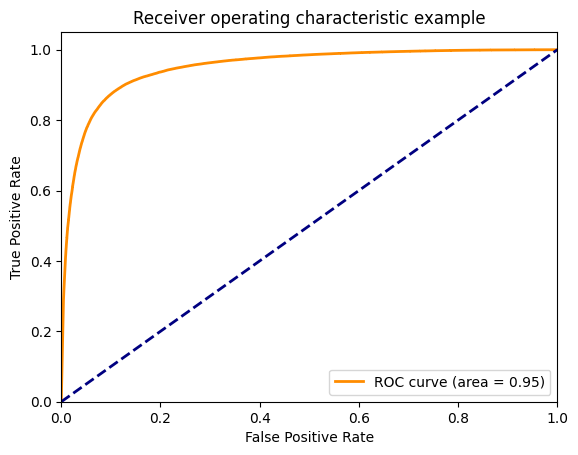

<ipython-input-168-5ec24b5ceb50>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-168-5ec24b5ceb50>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


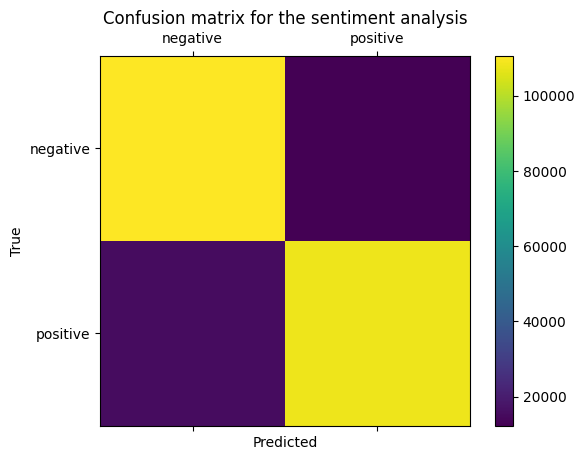

In [ ]:
print(classification_report(y_test, y_pred, digits=3))
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_pred_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

plot(cm)

**SVM classifier with linear kernel**

In [ ]:
def plot_auc(label, prediction):
    falsepositive = dict()
    truepositive = dict()
    roc_auc = dict()

    falsepositive, truepositive, _ = roc_curve(label, prediction, pos_label=1)
    roc_auc = auc(falsepositive, truepositive)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import GridSearchCV

def find_params(x_train, y_train):
    C_range = np.logspace(-3, 10, 8)
    param_grid = dict(C=C_range)
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    grid = GridSearchCV(LinearSVC(), param_grid=param_grid, cv=cv)
    grid.fit(x_train, y_train)


    score_dict = grid.grid_scores_

    scores = [x[1] for x in score_dict]
    scores = np.array(scores).reshape(len(C_range))

    plt.figure(figsize=(8, 6))
    plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.get_cmap("Spectral"))
    plt.ylabel('C')
    plt.colorbar()
    plt.yticks(np.arange(len(C_range)), C_range)
    plt.show()
    return grid.best_params_

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

def preprocess_data(data, frac=1, random_state=1234):
    df = data.sample(frac=frac, random_state=random_state)
    X = df['review']
    y = df['target']
    return X, y

def train_test_split_and_vectorize(X_train, X_test, max_features=None, ngram_range=(1, 3)):
    tf_vectorizer = TfidfVectorizer(ngram_range=ngram_range, max_features=max_features)
    X_train = tf_vectorizer.fit_transform(X_train)
    X_test = tf_vectorizer.transform(X_test)
    return X_train, X_test

def train_and_evaluate(X_train, X_test, y_train, y_test, use_params=False, C=None):
    if use_params:
        params = find_params(X_train, y_train)
        print('Best params:', params)
        svm = CalibratedClassifierCV(base_estimator=LinearSVC(C=params['C']), cv=5)
    else:
        svm = CalibratedClassifierCV(base_estimator=LinearSVC(C=C), cv=5)

    print(svm)

    t0 = time()
    svm.fit(X_train, y_train)
    train_test_time = time() - t0
    print("training time: {0:.2f}s".format(train_test_time))

    probas = svm.predict_proba(X_test)
    y_pred = np.argmax(probas, axis=-1)
    y_pred_prob = [i[1] for i in probas]

    acc_score = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print("Model accuracy = {0:.3f}%".format(acc_score * 100))
    print(classification_report(y_test, y_pred, digits=4))

    plot_auc(y_test, y_pred_prob)
    plot(cm)


CalibratedClassifierCV(base_estimator=LinearSVC(), cv=5)


/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


training time: 7.42s
Model accuracy = 90.196%
              precision    recall  f1-score   support

         0.0     0.8935    0.8982    0.8958       383
         1.0     0.9095    0.9053    0.9074       433

    accuracy                         0.9020       816
   macro avg     0.9015    0.9017    0.9016       816
weighted avg     0.9020    0.9020    0.9020       816



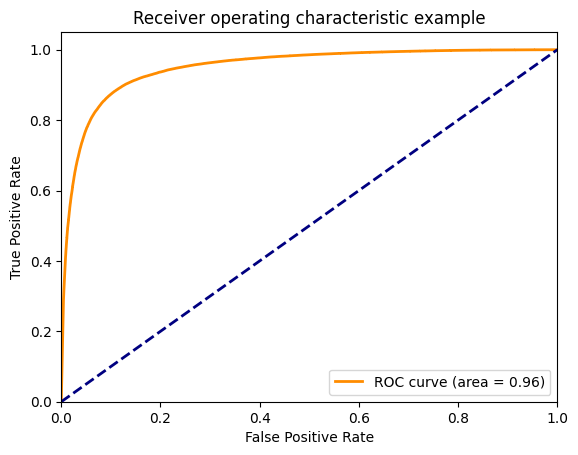

<ipython-input-168-5ec24b5ceb50>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-168-5ec24b5ceb50>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


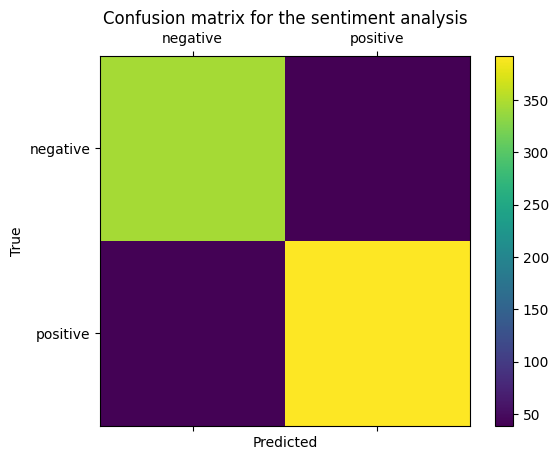

In [ ]:
train_data, test_data = train_test_split(df_train, test_size=0.02, random_state=45)
X_train, y_train = preprocess_data(train_data)
X_test, y_test = preprocess_data(test_data)

X_train, X_test = train_test_split_and_vectorize(X_train, X_test, max_features=None, ngram_range=(1, 3))

train_and_evaluate(X_train, X_test, y_train, y_test, use_params=False, C=1.0)

**CONVOLUTIONAL NEURAL NETWORK**

In [ ]:
from keras.layers import *
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.utils import shuffle

In [ ]:
X_train = list(df_train['review'])
X_test = list(df_test['review'])

In [ ]:
y_train = [[1,0] if x == 0 else [0,1] for x in df_train['target']]
y_test = [[1,0] if x == 0 else [0,1] for x in df_test['target']]

In [ ]:
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
max_feature = 5000
maxlen = 100
embed_size = 25

In [ ]:
tokenizer = Tokenizer(num_words=max_feature)
tokenizer.fit_on_texts(X_train)

In [ ]:
token_train = tokenizer.texts_to_sequences(X_train)
token_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train_final = pad_sequences(token_train, maxlen=maxlen, padding='post')
X_test_final = pad_sequences(token_test, maxlen=maxlen, padding='post')

In [ ]:
from IPython.display import clear_output
import keras

class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []

        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1

        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();

plot_losses = PlotLosses()

In [ ]:
from keras import optimizers
from keras import regularizers
eta = 1
maxlen=100
input = Input(shape=(maxlen,))
net = Embedding(max_feature, embed_size)(input)
net = Dropout(0.2)(net)
net = BatchNormalization()(net)

net = Conv1D(16, 8, padding='same', activation='relu')(net)
net = Dropout(0.2)(net)
net = BatchNormalization()(net)
net = Conv1D(16, 4, padding='same', activation='relu')(net)
net = Dropout(0.2)(net)
net = BatchNormalization()(net)
net = Conv1D(16, 4, padding='same', activation='relu')(net)
net = Dropout(0.2)(net)
net = BatchNormalization()(net)
net = Conv1D(16, 4, padding='same', activation='relu')(net)
net = Dropout(0.2)(net)
net1 = BatchNormalization()(net)

net = Conv1D(2, 1)(net)
net = GlobalAveragePooling1D()(net)
output = Activation('softmax')(net)
model = Model(inputs = input, outputs = output)
ada = optimizers.legacy.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=ada, loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 100, 25)           125000    
                                                                 
 dropout_10 (Dropout)        (None, 100, 25)           0         
                                                                 
 batch_normalization_10 (Ba  (None, 100, 25)           100       
 tchNormalization)                                               
                                                                 
 conv1d_10 (Conv1D)          (None, 100, 16)           3216      
                                                                 
 dropout_11 (Dropout)        (None, 100, 16)           0         
                                                           

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/adam.py:118: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


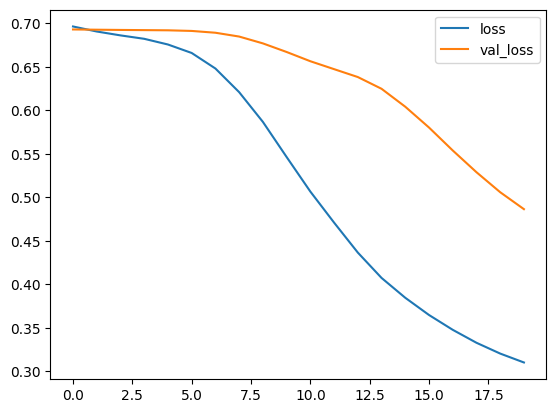

18/18 [==============================] - 10s 553ms/step - loss: 0.3101 - acc: 0.8786 - val_loss: 0.4864 - val_acc: 0.8327
Accuracy: 0.608083900809288


In [ ]:
train_res = model.fit(X_train_final, y_train, batch_size=2048, epochs=20, validation_split=0.1, callbacks=[plot_losses])
acc = train_res.history['val_acc']
print('Accuracy: {}'.format(np.mean(acc)))

7707/7707 [==============================] - 27s 3ms/step


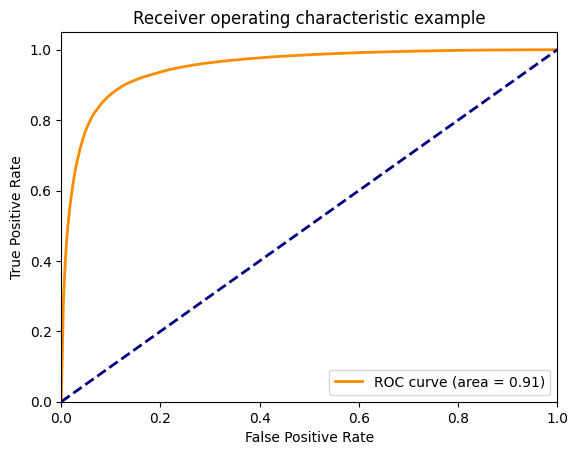

In [ ]:
y_prob = model.predict(X_test_final)
y_pred = y_prob.argmax(axis=-1)
y_test_raw = [0 if (x == [1,0]).all() else 1 for x in y_test]
y_pred_prob = [i[1] for i in y_prob]
plot_auc(y_test_raw, y_pred_prob)

<ipython-input-168-5ec24b5ceb50>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-168-5ec24b5ceb50>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


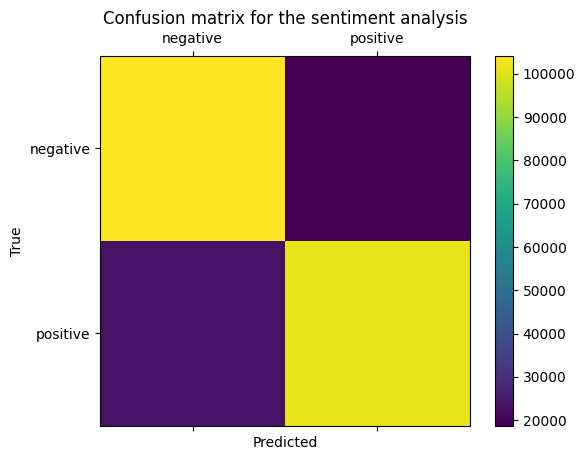

In [ ]:
plot(confusion_matrix(y_test_raw, y_pred))

In [ ]:
print(classification_report(y_test_raw, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8204    0.8474    0.8337    122897
           1     0.8433    0.8157    0.8293    123726

    accuracy                         0.8315    246623
   macro avg     0.8318    0.8316    0.8315    246623
weighted avg     0.8319    0.8315    0.8315    246623

